In [39]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 문제정의
- 아델리 펭귄, 젠투 펭귄, 턱끈 팽귄은 각각 신체의 특징이 다르다.
- 펭귄의 신체 특징으로 펭귄의 종을 분류 가능할 것이다.

# 데이터 로드

In [40]:
sns.get_dataset_names()

df = sns.load_dataset('penguins')

#df.head()

# 데이터 정보 확인

In [41]:
df.info()


''' 
species: 펭귄의 종류
island: 펭귄의 서식지 (섬)
bill_length_mm: 부리의 길이
bill_depth_mm: 부리의 단위
flipper_length_mm: 플리퍼(팔) 길이
body_mass_g: 체중
sex: 성별
'''

df.species.value_counts()

# 펭귄 종류는 3가지: 아델리, 젠투, 턱끈

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [42]:
df.describe()
# 데이터들의 수치를 확인하니 몸무게(body_mass)의 단위가 다른 피쳐에 비해 크다.
# 정규화가 필요할 수 있다.

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [43]:
# 결측치 확인
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [44]:
# 중복값 확인
df.duplicated().sum()

0

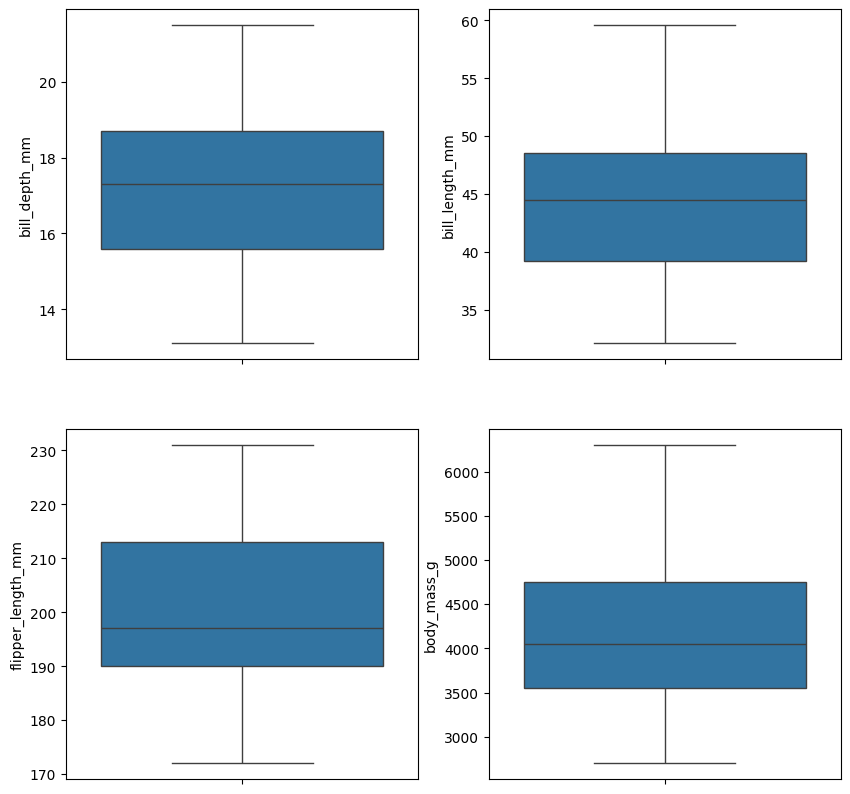

In [45]:
# 이상치 확인
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(data=df.bill_depth_mm, ax=ax[0, 0])
sns.boxplot(data=df.bill_length_mm, ax=ax[0, 1])
sns.boxplot(data=df.flipper_length_mm, ax=ax[1, 0])
sns.boxplot(data=df.body_mass_g, ax=ax[1, 1])

plt.show()

# 이상치 없다.

# 데이터 전처리

In [46]:
df.columns

# 일부 컬럼에 단위가 적혀있다 -> 제거하자
df.columns = ['species', 'island', 'bill_length', 'bill_depth', 'flipper_length', 'body_mass', 'sex']

df.head()

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [47]:
# 결측치 처리하기
print(df.isna().sum())

is_isna = df['bill_length'].isna()

df[is_isna]


# 확인을 해보니 5개 컬럼이 결측치인 행이 2개 존재 -> 제거한다. ??? 여기서부터 뭔가 잘못된 것 같음ㅠㅠ
df.dropna()

df.isna().sum()


species            0
island             0
bill_length        2
bill_depth         2
flipper_length     2
body_mass          2
sex               11
dtype: int64


species            0
island             0
bill_length        2
bill_depth         2
flipper_length     2
body_mass          2
sex               11
dtype: int64

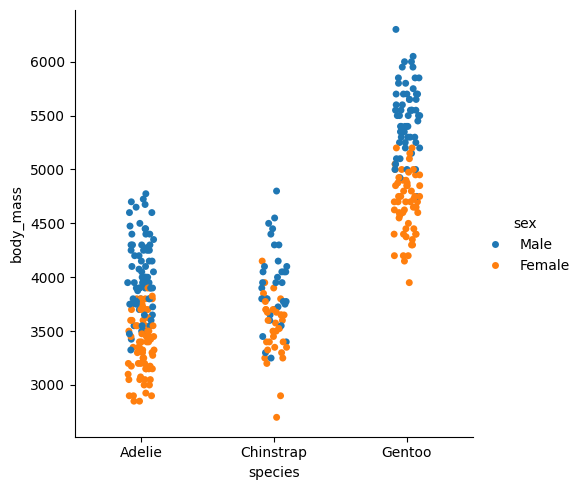

In [48]:
''' 
성별은 결측치행이 아직 존재
성별이 펭귄 종과 연관이 있는가? -> 없다고 예상되지만 확인을 해봐야한다.
성별이라는 피쳐 하나만 봤을 때는 관계가 없을 수 있드나
특정 종과 성별에 조합에서 보이는 특징이 있을 수 있기 때문에 확인을 해봐야 함
'''

# 산점도를 그려보자
# 데이터 분포와 상관관계 확인해보기
#sns.scatterplot(df, x='species', y='body_mass', hue='sex') # hue='sex': 성별로 그룹화


# 산점도로 데이터 분포를 확인하기 좋으나 x 축에서 사용하는 피쳐가 species처럼 범주형 데이터인 경우
# 점이 서로 겹쳐서 분포확인이 힘들다.
# 이런 경우 catplot을 사용하면 좋다.

sns.catplot(df, x='species', y='body_mass', hue='sex')
plt.show()

# 확인해보니 암컷 젠투펭귄은 몸무게와 같이 확인하였을 때 다른 종의 펭귄과 차이가 난다.
# -> 성별이 암컷인데 몸무게가 4500 언저리라면 젠투펭귄일 가능성이 높다

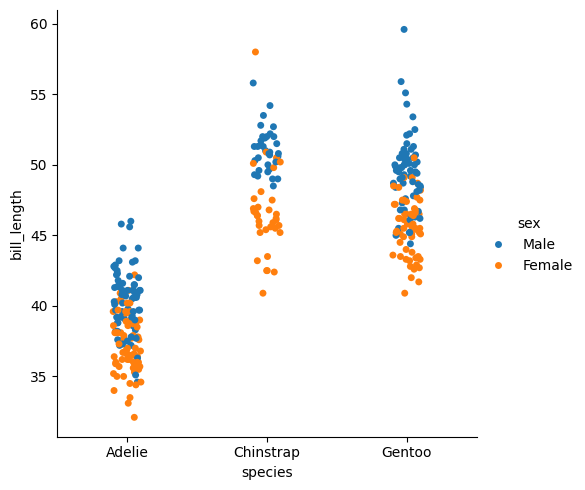

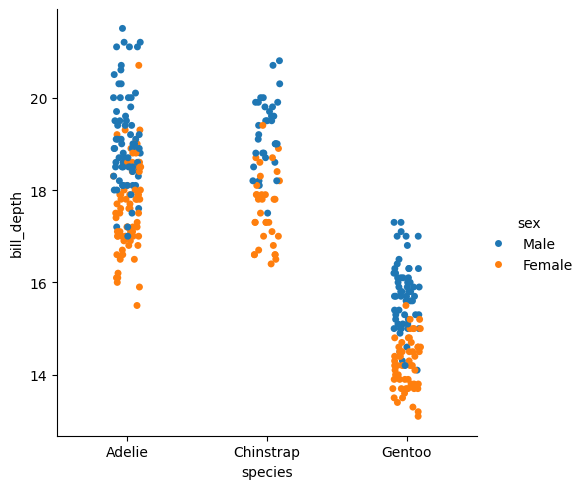

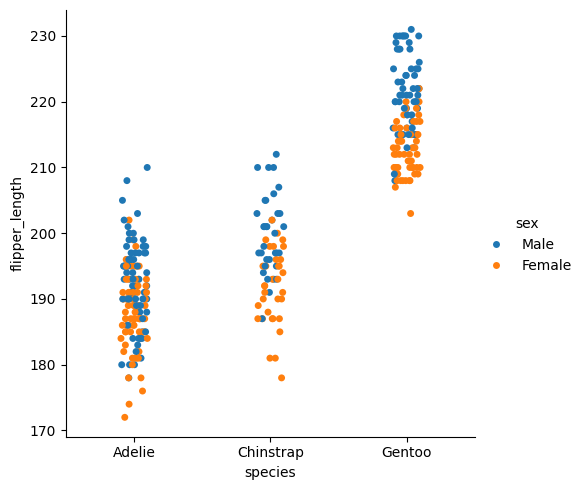

In [49]:
sns.catplot(df, x='species', y='bill_length', hue='sex')
sns.catplot(df, x='species', y='bill_depth', hue='sex')
sns.catplot(df, x='species', y='flipper_length', hue='sex')

plt.show()

# 'sex(성별)'이 종에 따라 부리, 몸무게 등의 값에 영향이 있는 것 같기 때문에 성별칼럼을 삭제하지 않는 것이 좋을 것 같음

In [53]:
# 성별 결측치 처리
# 성별 칼럼이 유의미하다고 판단하였으니 컬럼은 유지한 채 결측치를 어떻게 처리할지 확인
# 1. 대체값
# 성별은 범주형 데이터이기 때문에 남/여 둘 중 하나를 넣어야 함(평균, 중앙값이 없음)
# -> 내가 임의로 남/여를 넣어야 한느데 이건 위험할 수 있다.
# 2. 행삭제
# 342 개의 행 중 9개의 결측치 행을 삭제해야 괜찮은지 행각 -> 괜찮다고 판단

df.info()

s_isna = df['sex'].isna()
idx = df[s_isna].index

## 뭔가 잘못된거 같다???
df.drop(idx, inplace=True)
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         333 non-null    object 
 1   island          333 non-null    object 
 2   bill_length     333 non-null    float64
 3   bill_depth      333 non-null    float64
 4   flipper_length  333 non-null    float64
 5   body_mass       333 non-null    float64
 6   sex             333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


(333, 7)

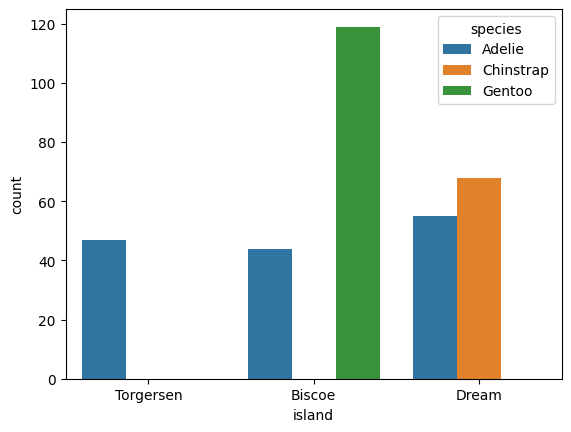

In [54]:
# 서식지와 품종의 관계
# 분류형 데이터와 분류형 데이터간의 관계를 확인해보자
# 특정 섬에 특정 펭귄만 서식한다면 데이터 분석의 의미가 없을 것이므로 확인 후 제거할지 결정한다.
sns.countplot(df, x='island', hue='species')
plt.show()

In [55]:
df.drop('island', axis=1, inplace=True)
df.head()

,species,bill_length,bill_depth,flipper_length,body_mass,sex
0,Adelie,39.1,18.7,181.0,3750.0,Male
1,Adelie,39.5,17.4,186.0,3800.0,Female
2,Adelie,40.3,18.0,195.0,3250.0,Female
4,Adelie,36.7,19.3,193.0,3450.0,Female
5,Adelie,39.3,20.6,190.0,3650.0,Male


# 데이터 관계 파악

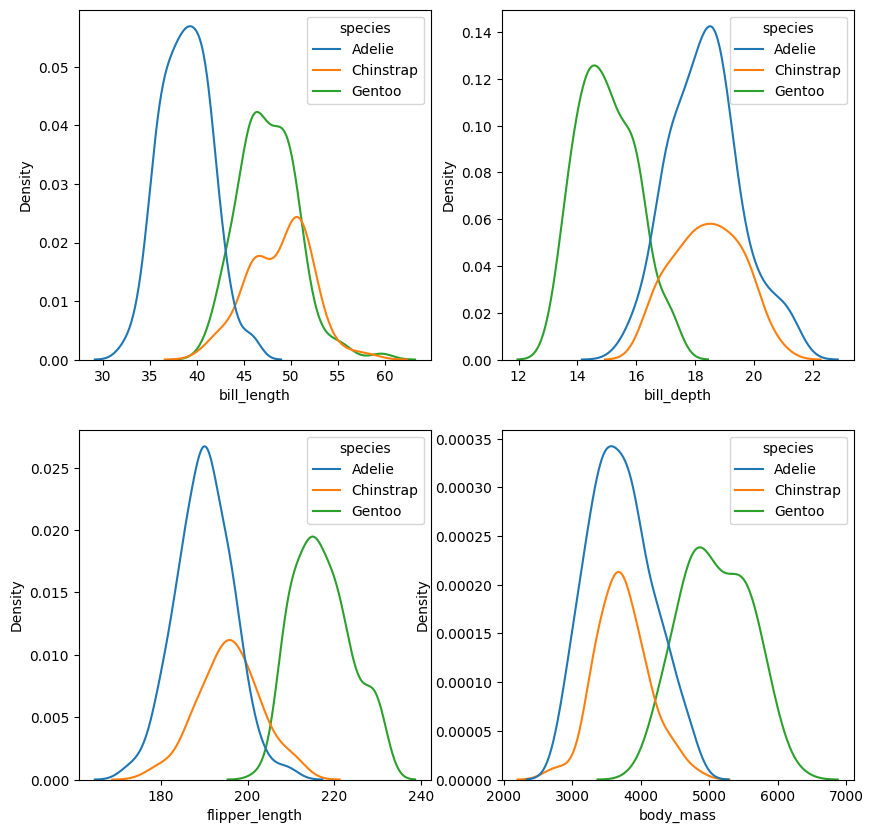

In [60]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.kdeplot(df, x='bill_length', hue='species', ax=ax[0, 0])
sns.kdeplot(df, x='bill_depth', hue='species', ax=ax[0, 1])
sns.kdeplot(df, x='flipper_length', hue='species', ax=ax[1, 0])
sns.kdeplot(df, x='body_mass', hue='species', ax=ax[1, 1])
plt.show()


# 부리 길이: 아델리 펭귄의 데이터 분포가 다른 종과 차이점이 보임
# 부리 깊이: 젠투 펭귄의 데이터 분포가 다른 종과 차이점이 보임
# 팔 길이: 젠투 펭귄의 데이터 분포가 다른 종과 차이점이 보임
# 몸무게: 젠투 펭귄의 데이터 분포가 다른 종과 차이점이 보임

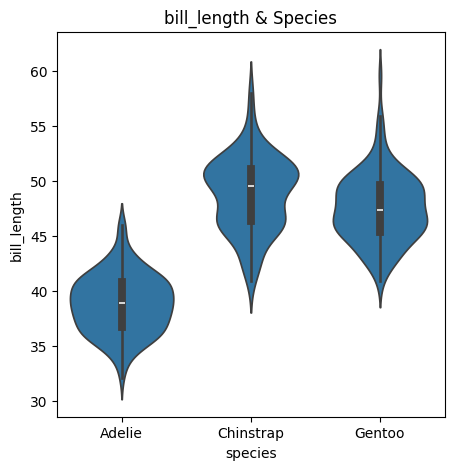

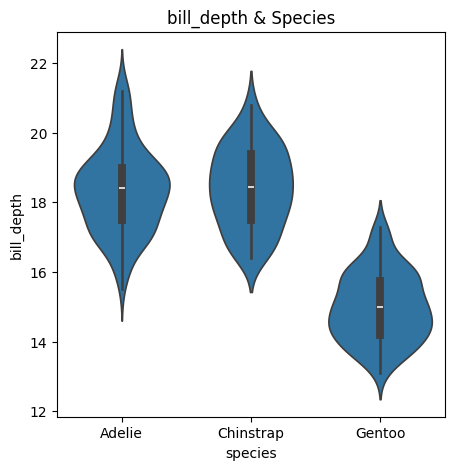

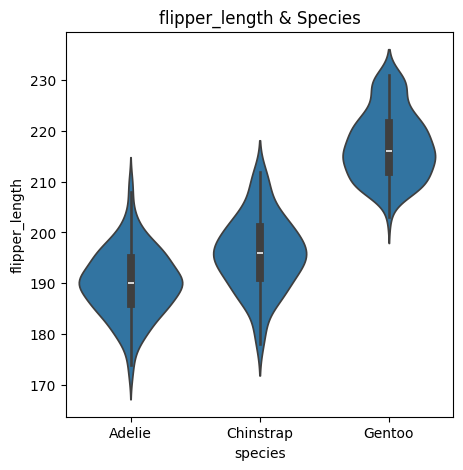

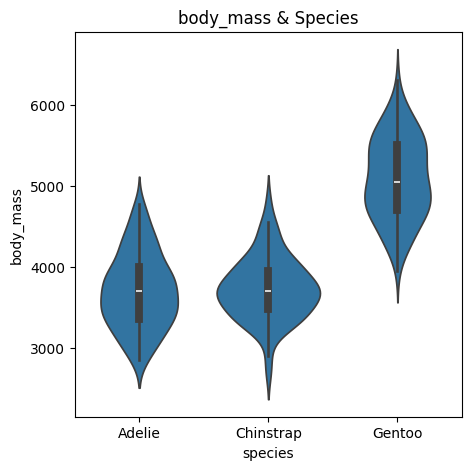

In [61]:
features = ['bill_length', 'bill_depth', 'flipper_length', 'body_mass']

for feature in features:
    plt.figure(figsize=(5, 5))
    sns.violinplot(x='species', y=feature, data=df)
    plt.title(f'{feature} & Species')
    plt.show()

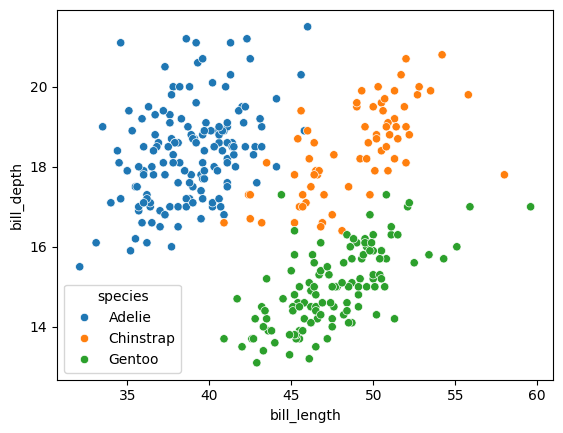

In [62]:
# 부리 길이/깊이
sns.scatterplot(df, x='bill_length', y='bill_depth', hue='species')
plt.show()

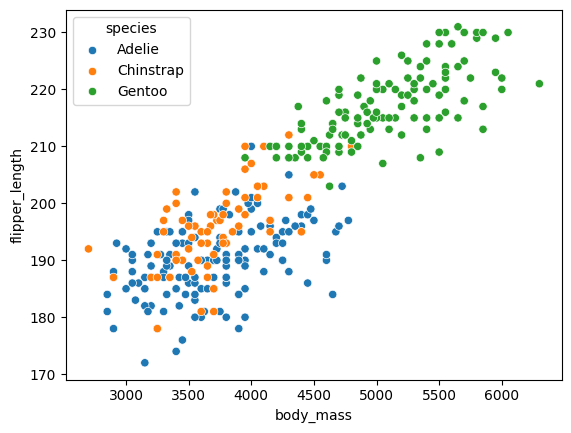

In [64]:
# 몸무게와 팔길이
sns.scatterplot(df, x='body_mass', y='flipper_length', hue='species')
plt.show()

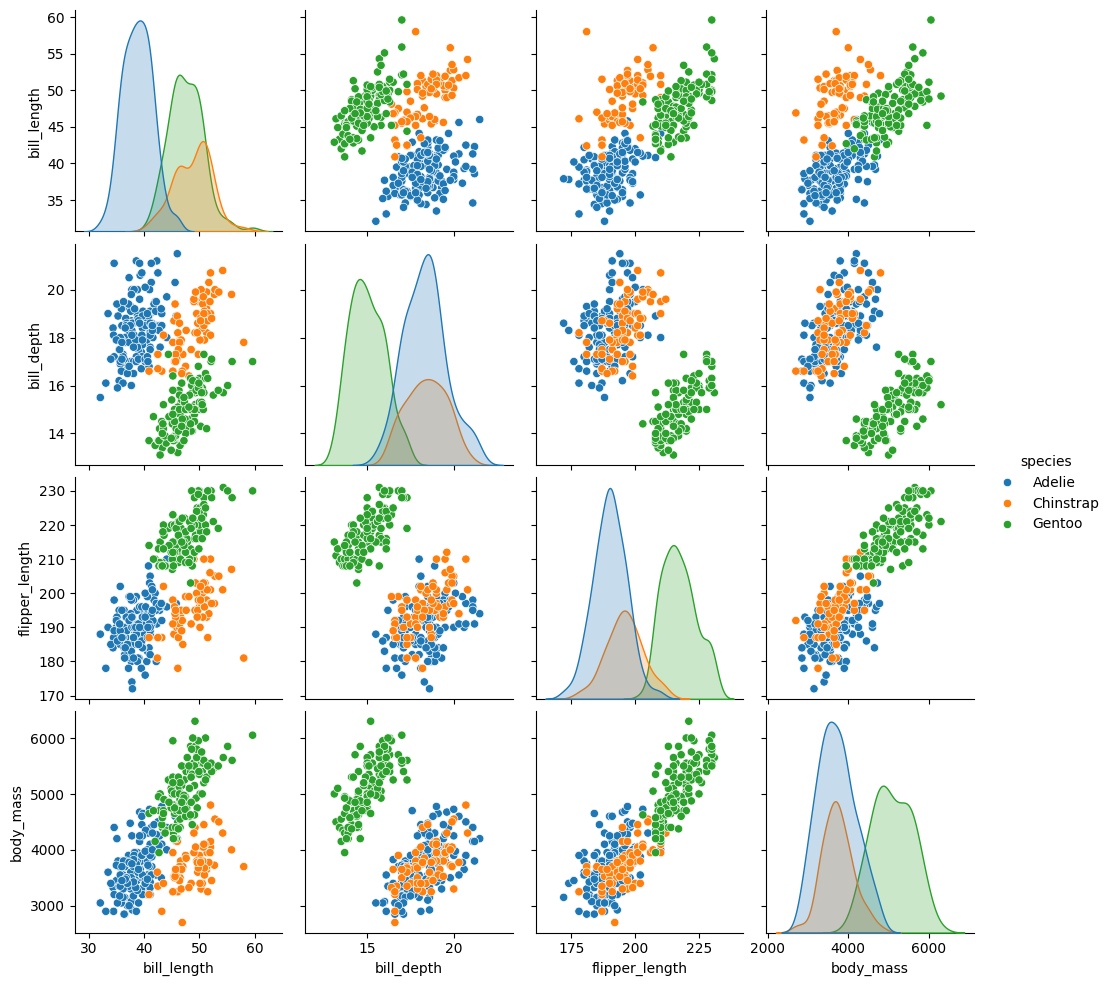

In [65]:
sns.pairplot(df, hue='species')
plt.show()

In [70]:
# 상관계수 확인하기
# df.corr()

# 범주형을 수치형으로 변환하기 (펭귄 종과 성별)
df_num = df.copy()

# 종을 0, 1, 2로 구분하도록 바꾼다 (string -> number)
df_num.species = df_num['species'].map({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})
df_num.species.value_counts()

# 성별을 0, 1로 바꾼다 (string -> number)
df_num.sex = df_num['sex'].map({'Male':0, 'Female':1})
df_num.head()


,species,bill_length,bill_depth,flipper_length,body_mass,sex
0,0,39.1,18.7,181.0,3750.0,0
1,0,39.5,17.4,186.0,3800.0,1
2,0,40.3,18.0,195.0,3250.0,1
4,0,36.7,19.3,193.0,3450.0,1
5,0,39.3,20.6,190.0,3650.0,0


<Axes: >

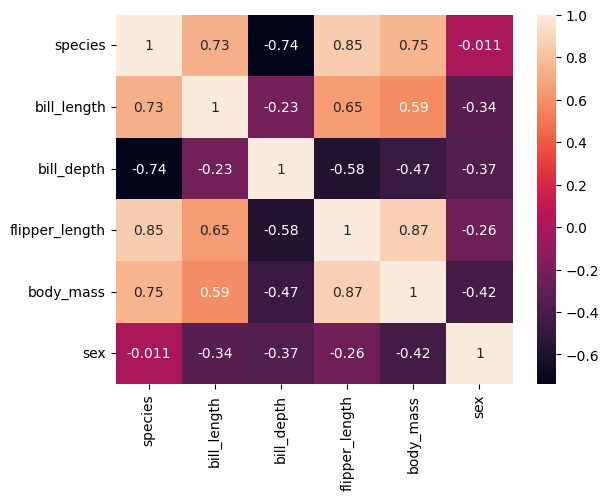

In [71]:
# 히트맵 시각화
sns.heatmap(df_num.corr(), annot=True)

# 머신러닝
### 데이터셋 분할

In [74]:
from sklearn.model_selection import train_test_split

df_num.head()

# 독립변수, 종속변수를 분리하자

# 독립변수: X
X = df_num.loc[:, 'bill_length':'sex']
X

# 종속변수: y
y = df_num['species']
y

0      0
1      0
2      0
4      0
5      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: species, Length: 333, dtype: int64

### 데이터 정규화

In [75]:
X.describe()
# 데이터의 수치 단위가 너무 다른 경우 모델 학습에 문제가 생길 수 있다.
# 이를 표준화시켜 좀 더 좋은 결과를 만들 수 있다. (정규화)

,bill_length,bill_depth,flipper_length,body_mass,sex
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,0.495495
std,5.468668,1.969235,14.015765,805.215802,0.500732
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,44.500000,17.300000,197.000000,4050.000000,0.000000
75%,48.600000,18.700000,213.000000,4775.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,1.000000


In [79]:
from sklearn.preprocessing import MinMaxScaler  # sklearn.preprocessing: 전처리하는 모듈
# 최대 최소 정규화하는 모듈: MinMaxScale
# 모든 값을 0~1 사이의 범위로 재조정한다.
scaler = MinMaxScaler()
scaler.fit_transform(X)

# scaler.fit_transform(X) 이거를 DataFrame으로 형변환
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # X에 정규화된 데이터가 DataFrame 형태로 들어감

,bill_length,bill_depth,flipper_length,body_mass,sex
0,0.254545,0.666667,0.152542,0.291667,0.0
1,0.269091,0.511905,0.237288,0.305556,1.0
2,0.298182,0.583333,0.389831,0.152778,1.0
3,0.167273,0.738095,0.355932,0.208333,1.0
4,0.261818,0.892857,0.305085,0.263889,0.0
...,...,...,...,...,...
328,0.549091,0.071429,0.711864,0.618056,1.0
329,0.534545,0.142857,0.728814,0.597222,1.0
330,0.665455,0.309524,0.847458,0.847222,0.0
331,0.476364,0.202381,0.677966,0.694444,1.0


In [117]:
# 학습이랑 데이터랑 분리한다

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(233, 5) (233,)
(100, 5) (100,)


In [118]:
from sklearn.neighbors import KNeighborsClassifier as kn 

#knn = kn(n_neighbors=7)
knn = kn(n_neighbors=3)

# 훈련
knn.fit(X_train, y_train)

# 테스트
y_knn_pred = knn.predict(X_test)
print('예측값: ', y_knn_pred[:10])
print('실제값: ', y_test[:10].values)
# ?? 왜 나는 예측값과 실제값이 다를까..

예측값:  [0 2 1 2 2 2 1 2 0 2]
실제값:  [0 2 1 2 2 2 1 2 0 2]


In [119]:
from sklearn.metrics import accuracy_score

knn_acc = accuracy_score(y_test, y_knn_pred)
print('정확도: ', knn_acc)

정확도:  1.0


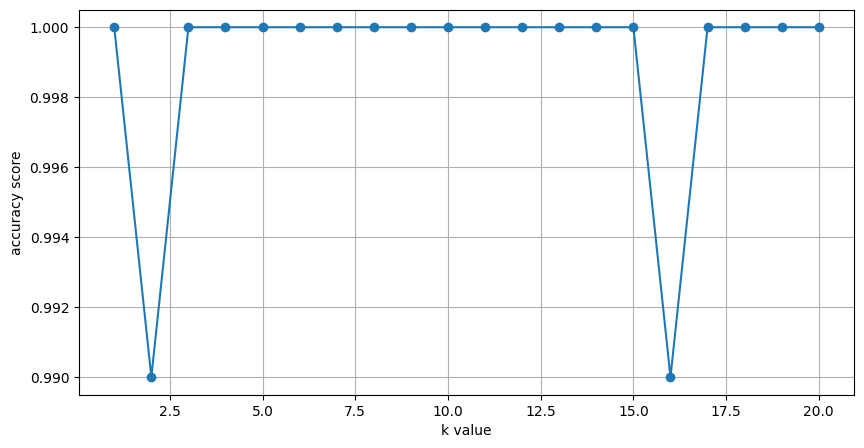

In [120]:
# neighbro = 7이 최적화 값인지 모르니까 확인 필요하다..

acc_list = []

for k in range(1, 21):
    knn = kn(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), acc_list, marker='o') # 첫번째 parameter: X, 두 번째: y 축에 나올 값, 세 번째: 값을 점으로 찍어라
plt.xlabel('k value')
plt.ylabel('accuracy score')
plt.grid(True)
plt.show()

# SVM 도 사용해보자

In [122]:
from sklearn.svm import SVC  

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [125]:
y_svc_pred = svc.predict(X_test)

# 정확도 확인
svc_acc = accuracy_score(y_test, y_svc_pred)

svc_acc 

1.0